In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#sns.set(font='NanumBarunGothic', font_scale=2.5)
sns.set(font='Malgun Gothic', font_scale=2.5)
plt.rcParams['axes.unicode_minus'] = False

import scipy.stats as stats

In [9]:
df = pd.read_csv('../data/car.csv')
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6194 non-null   object 
 1   Location           6194 non-null   object 
 2   Price              6194 non-null   float64
 3   Year               6194 non-null   int64  
 4   Kilometers_Driven  6194 non-null   int64  
 5   Fuel_Type          6194 non-null   object 
 6   Transmission       6194 non-null   object 
 7   Owner_Type         6194 non-null   object 
 8   Mileage            6194 non-null   object 
 9   Engine             6194 non-null   object 
 10  Power              6194 non-null   object 
 11  Seats              6194 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 580.8+ KB


In [11]:
df.isnull().sum()

Name                 0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [12]:
df.describe()

,Price,Year,Kilometers_Driven,Seats
count,6194.000000,6194.000000,6.194000e+03,6194.000000
mean,14914.885103,2013.439296,5.813416e+04,5.278172
std,17680.889395,3.263241,9.012881e+04,0.803845
min,7.080000,1998.000000,1.710000e+02,2.000000
25%,5365.360000,2012.000000,3.300000e+04,5.000000
50%,8814.520000,2014.000000,5.251450e+04,5.000000
75%,15839.312500,2016.000000,7.224075e+04,5.000000
max,245273.600000,2019.000000,6.500000e+06,10.000000


In [13]:
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5


In [14]:
df['Engine_unit'] = df['Engine'].str.split(' ').str[1]
df['Engine_num'] = df['Engine'].str.split(' ').str[0]
df['Engine_num'] = df['Engine_num'].astype('float')

In [15]:
df['Engine_unit'].value_counts()

Engine_unit
CC    6194
Name: count, dtype: int64

In [16]:
df['Engine_num'].describe()

count    6194.000000
mean     1619.429125
std       601.119751
min       624.000000
25%      1197.000000
50%      1493.000000
75%      1975.750000
max      5998.000000
Name: Engine_num, dtype: float64

In [17]:
df['Power_unit'] = df['Power'].str.split(' ').str[1]
df['Power_num'] = df['Power'].str.split(' ').str[0]
df['Power_num'] = df['Engine_num'].astype('float')

In [18]:
df['Power_num'].value_counts()

Power_num
1197.0    634
1248.0    530
1498.0    319
998.0     275
2179.0    240
         ... 
1422.0      1
2706.0      1
2694.0      1
1978.0      1
1797.0      1
Name: count, Length: 145, dtype: int64

### Mileage 단위 통일
- 기름 1L : 0.9 kg
- km/L로 단위 통일

In [20]:
df['Mileage_unit'] = df['Mileage'].str.split(' ').str[1]
df['Mileage_num'] = df['Mileage'].str.split(' ').str[0]
df['Mileage_unit'].value_counts()

Mileage_unit
kmpl     6127
km/kg      67
Name: count, dtype: int64

<Axes: >

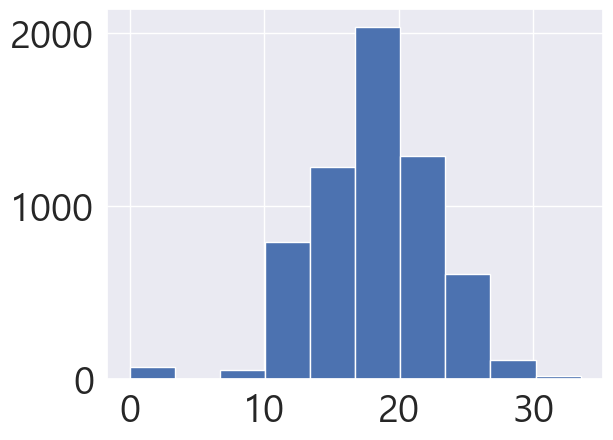

In [21]:
df['Mileage_num'] = df['Mileage_num'].astype('float')
df['Mileage_num'].hist()

In [22]:
df['Mileage_num'].describe()
df[df['Mileage_unit'] == 'km/kg']['Mileage_num']

0       26.60
5       21.10
127     26.60
327     26.30
439     15.10
        ...  
5875    26.60
5896    26.20
5929    32.26
5991    26.20
6123    32.26
Name: Mileage_num, Length: 67, dtype: float64

In [23]:
df.loc[df['Mileage_unit'] == 'km/kg', 'Mileage_num'] *= 0.9

In [24]:
df[df['Mileage_unit'] == 'km/kg']['Mileage_num']

0       23.940
5       18.990
127     23.940
327     23.670
439     13.590
         ...  
5875    23.940
5896    23.580
5929    29.034
5991    23.580
6123    29.034
Name: Mileage_num, Length: 67, dtype: float64

<Axes: >

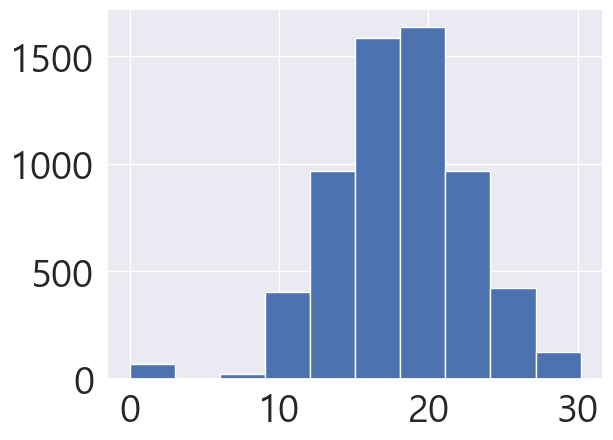

In [25]:
df['Mileage_num'].hist()

In [26]:
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Engine_unit,Engine_num,Power_unit,Power_num,Mileage_unit,Mileage_num
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,CC,998.0,bhp,998.0,km/kg,23.94
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,CC,1582.0,bhp,1582.0,kmpl,19.67
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,CC,1199.0,bhp,1199.0,kmpl,18.20
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,CC,1248.0,bhp,1248.0,kmpl,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,CC,1968.0,bhp,1968.0,kmpl,15.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28 kmpl,1047 CC,69 bhp,5,CC,1047.0,bhp,1047.0,kmpl,27.28
6190,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5,CC,1497.0,bhp,1497.0,kmpl,17.00
6191,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.0 kmpl,1368 CC,160 bhp,5,CC,1368.0,bhp,1368.0,kmpl,16.00
6192,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5,CC,1248.0,bhp,1248.0,kmpl,24.30


In [27]:
# 이상치 제거

df = df[df['Power_num'] != 'null']
df = df[df['Seats'] != 0]
df = df[df['Mileage_num'] != 'null']

In [28]:
df.columns

Index(['Name', 'Location', 'Price', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Engine_unit', 'Engine_num', 'Power_unit', 'Power_num', 'Mileage_unit',
       'Mileage_num'],
      dtype='object')

In [29]:
df = df[['Name', 'Location', 'Price', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'Engine_num', 'Power_num', 'Mileage_num']]

In [30]:
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Engine_num,Power_num,Mileage_num
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,5,998.0,998.0,23.94
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,5,1582.0,1582.0,19.67
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,5,1199.0,1199.0,18.20
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,7,1248.0,1248.0,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,5,1968.0,1968.0,15.20
...,...,...,...,...,...,...,...,...,...,...,...,...
6189,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,First,5,1047.0,1047.0,27.28
6190,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,First,5,1497.0,1497.0,17.00
6191,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,First,5,1368.0,1368.0,16.00
6192,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,First,5,1248.0,1248.0,24.30


In [31]:
df = df.rename(columns={'Mileage_num': 'Mileage', 'Power_num' : 'Power', 'Engine_num' : 'Engine'})
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Engine,Power,Mileage
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,5,998.0,998.0,23.94
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,5,1582.0,1582.0,19.67
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,5,1199.0,1199.0,18.20
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,7,1248.0,1248.0,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,5,1968.0,1968.0,15.20
...,...,...,...,...,...,...,...,...,...,...,...,...
6189,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,First,5,1047.0,1047.0,27.28
6190,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,First,5,1497.0,1497.0,17.00
6191,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,First,5,1368.0,1368.0,16.00
6192,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,First,5,1248.0,1248.0,24.30


<Axes: >

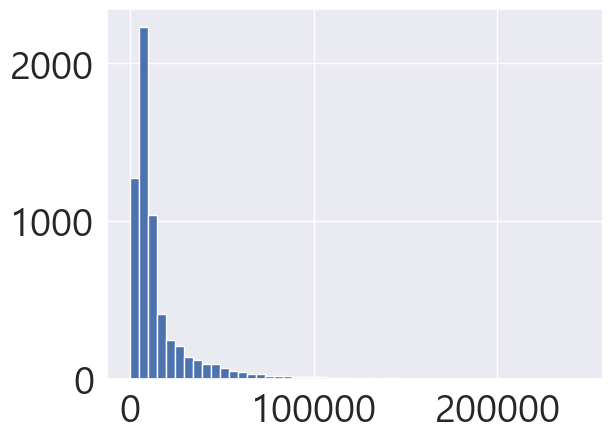

In [32]:
df['Price'].hist(bins = 50)

In [37]:
df[['Kilometers_Driven']].describe().round(3)

,Kilometers_Driven
count,6194.000
mean,58134.162
std,90128.807
min,171.000
25%,33000.000
50%,52514.500
75%,72240.750
max,6500000.000


In [41]:
df = df[df['Kilometers_Driven'] != 6500000]

In [46]:
df[['Kilometers_Driven']].describe().round(3)

,Kilometers_Driven
count,6193.000
mean,57093.977
std,37704.337
min,171.000
25%,33000.000
50%,52513.000
75%,72204.000
max,775000.000


<Axes: >

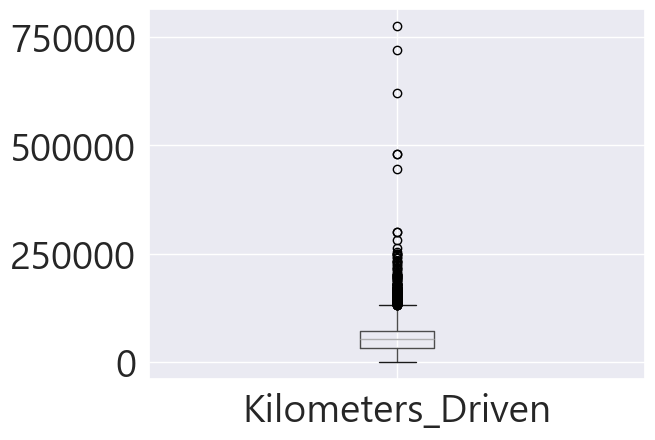

In [48]:
df[['Kilometers_Driven']].boxplot()

In [49]:
df.describe().round(3)

,Price,Year,Kilometers_Driven,Seats,Engine,Power,Mileage
count,6193.000,6193.000,6193.000,6193.000,6193.000,6193.000,6193.000
mean,14901.204,2013.439,57093.977,5.278,1619.207,1619.207,18.163
std,17649.498,3.263,37704.337,0.804,600.915,600.915,4.532
min,7.080,1998.000,171.000,2.000,624.000,624.000,0.000
25%,5365.360,2012.000,33000.000,5.000,1197.000,1197.000,15.260
50%,8814.520,2014.000,52513.000,5.000,1493.000,1493.000,18.200
75%,15804.820,2016.000,72204.000,5.000,1969.000,1969.000,21.100
max,245273.600,2019.000,775000.000,10.000,5998.000,5998.000,30.186


In [53]:
df = df[df['Price'] != 7.080]

In [55]:
df = df[df['Mileage'] != 0]

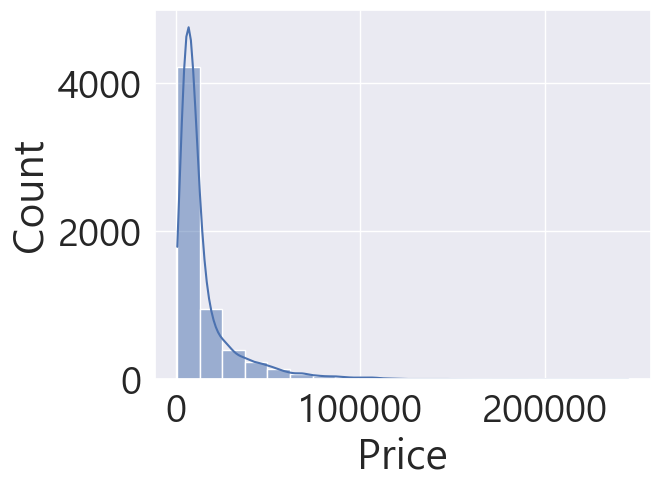

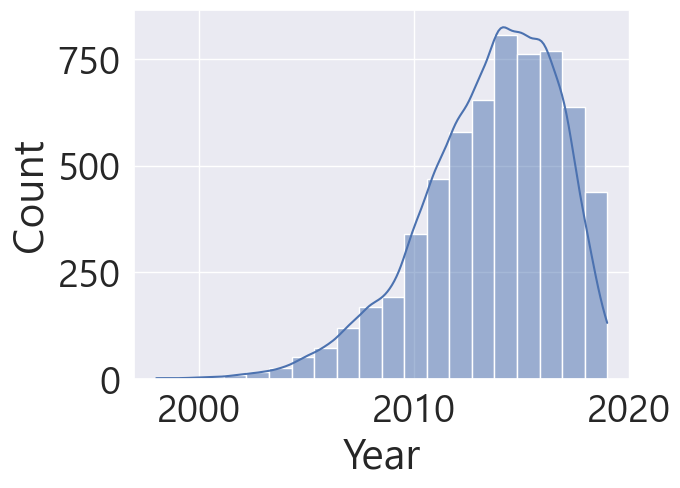

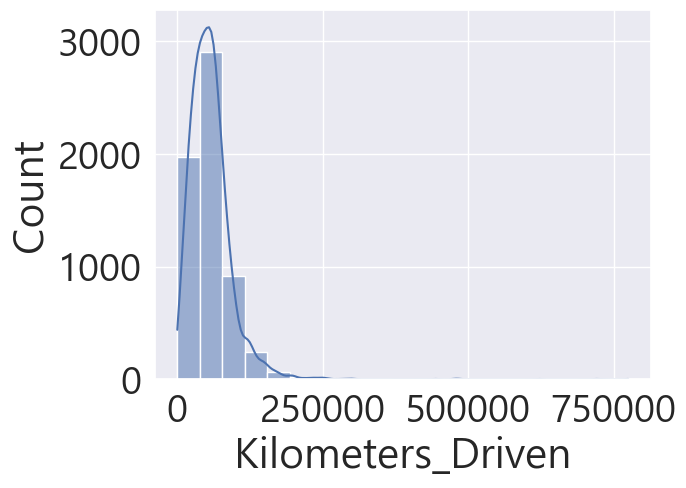

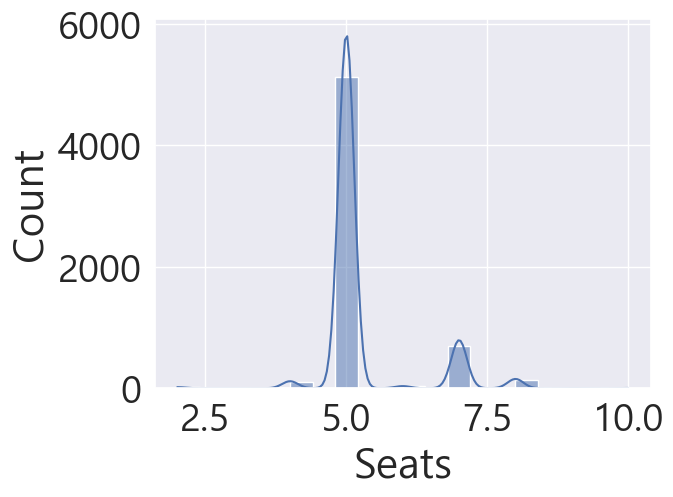

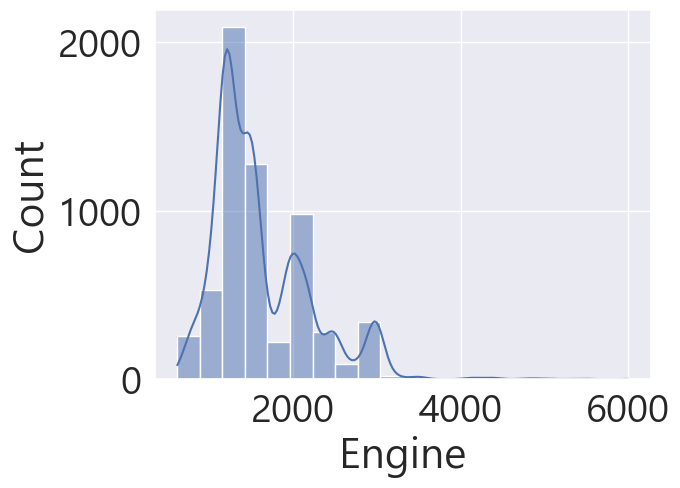

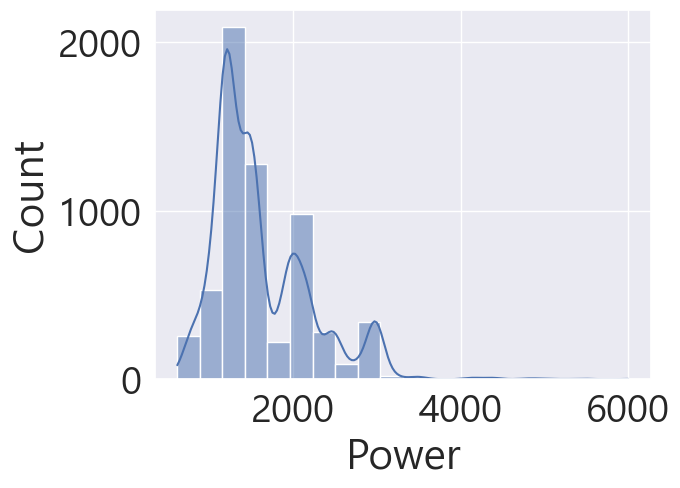

In [56]:
con_list = ['Price', 'Year', 'Kilometers_Driven', 'Seats', 'Engine', 'Power']

for col in con_list:
    sns.histplot(df[col], bins = 20, kde = True)
    plt.show()

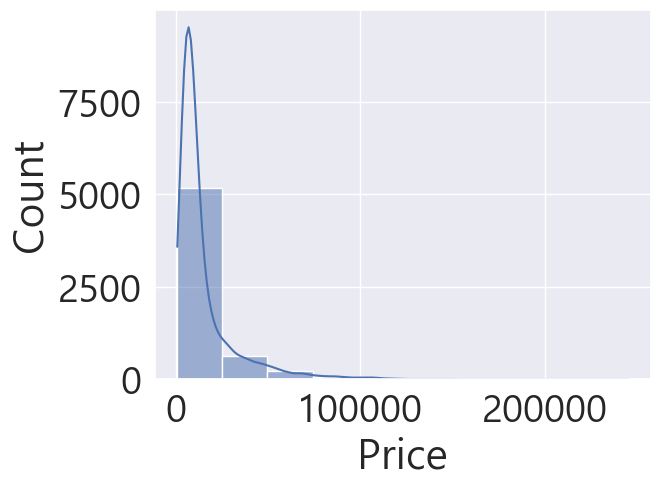

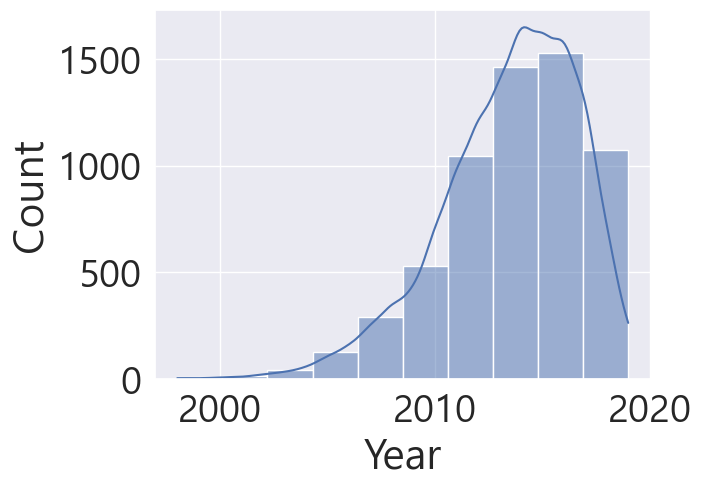

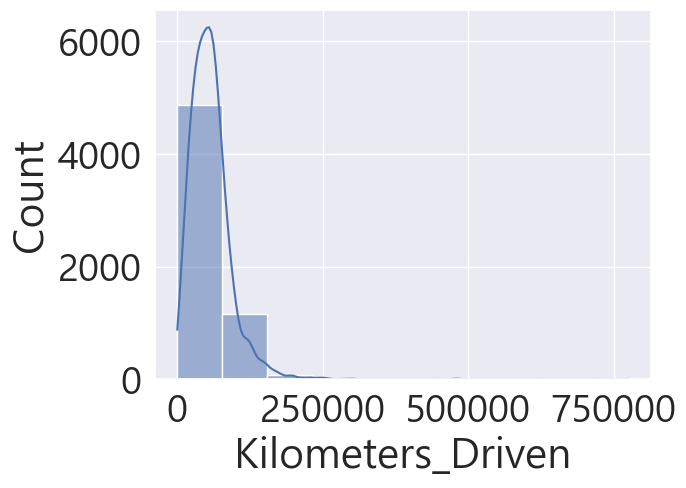

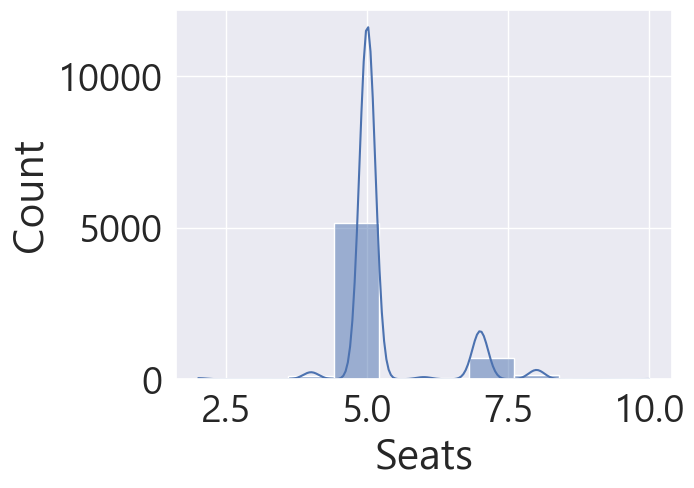

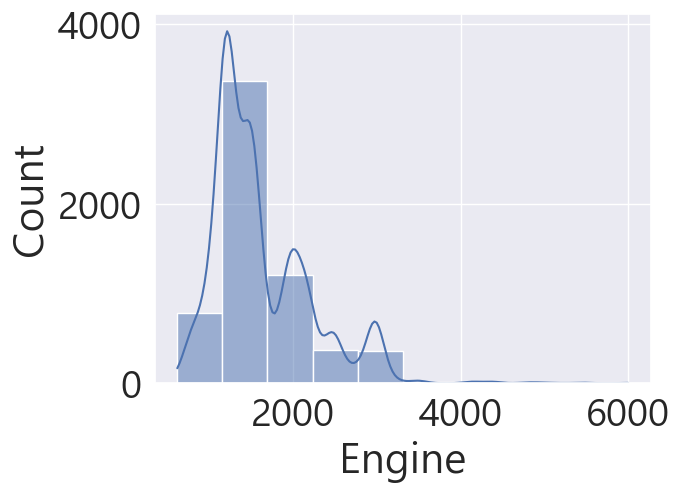

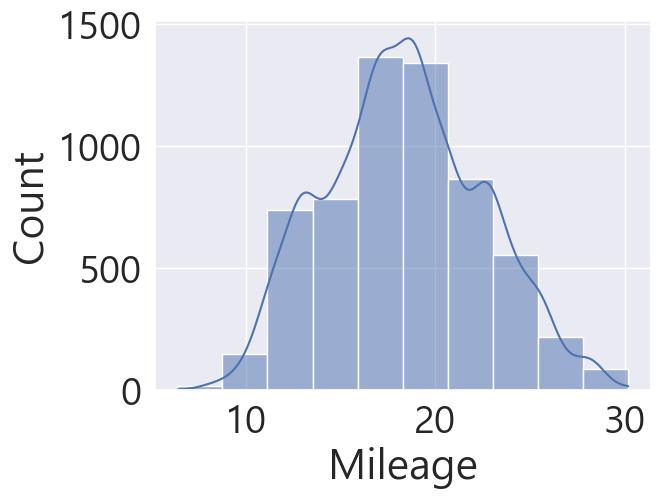

In [61]:
df_temp = df[df['Kilometers_Driven'] != 775000]

con_list = ['Price', 'Year', 'Kilometers_Driven', 'Seats', 'Engine', 'Mileage']

for col in con_list:
    sns.histplot(df[col], bins = 10, kde = True)
    plt.show()

In [65]:
df['Location'].value_counts().index

Index(['Mumbai', 'Hyderabad', 'Kochi', 'Coimbatore', 'Pune', 'Delhi',
       'Kolkata', 'Chennai', 'Jaipur', 'Bangalore', 'Ahmedabad'],
      dtype='object', name='Location')

In [66]:
df1 = df[df['Location'] == 'Mumbai']
df2 = df[df['Location'] == 'Hyderabad']
df3 = df[df['Location'] == 'Coimbatore']
df4 = df[df['Location'] == 'Kochi']
df5 = df[df['Location'] == 'Pune']
df6 = df[df['Location'] == 'Delhi']
df7 = df[df['Location'] == 'Kolkata']
df8 = df[df['Location'] == 'Chennai']
df9 = df[df['Location'] == 'Jaipur']
df10 = df[df['Location'] == 'Bangalore']
df11 = df[df['Location'] == 'Ahmedabad']
f_result = stats.f_oneway(df1['Price'],df2['Price'],df3['Price'], df4['Price'], df5['Price'], df6['Price'], df7['Price'], \
                          df8['Price'], df9['Price'], df10['Price'], df11['Price'])
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)
f, p

df_list = [df1['Price'],df2['Price'],df3['Price'], df4['Price'], df5['Price'], df6['Price'], df7['Price'], \
                          df8['Price'], df9['Price'], df10['Price'], df11['Price']]
df_name_list = ['Mumbai', 'Hyderabad','Coimbatore', 'Kochi', 'Pune', 'Delhi',
       'Kolkata', 'Chennai', 'Jaipur', 'Bangalore', 'Ahmedabad']
cnt = 0

for i in range(len(df_list)):
    for j in range(len(df_list)):
        if i >= j:
            continue
        t_result = stats.ttest_ind(df_list[i], df_list[j])
        t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
        if p<0.05:
            print(f'2 sample t-test between {df_name_list[i]} and {df_name_list[j]}')
            print('F-통계량 : ', f)
            print('p-value : ', p)
            print('차이 있음\n')
            cnt += 1
        print('-----------------------\n\n')

print(cnt)
            

-----------------------


2 sample t-test between Mumbai and Coimbatore
F-통계량 :  39.126
p-value :  0.0
차이 있음

-----------------------


2 sample t-test between Mumbai and Kochi
F-통계량 :  39.126
p-value :  0.01
차이 있음

-----------------------


2 sample t-test between Mumbai and Pune
F-통계량 :  39.126
p-value :  0.0
차이 있음

-----------------------


-----------------------


2 sample t-test between Mumbai and Kolkata
F-통계량 :  39.126
p-value :  0.0
차이 있음

-----------------------


2 sample t-test between Mumbai and Chennai
F-통계량 :  39.126
p-value :  0.0
차이 있음

-----------------------


2 sample t-test between Mumbai and Jaipur
F-통계량 :  39.126
p-value :  0.0
차이 있음

-----------------------


2 sample t-test between Mumbai and Bangalore
F-통계량 :  39.126
p-value :  0.0
차이 있음

-----------------------


-----------------------


2 sample t-test between Hyderabad and Coimbatore
F-통계량 :  39.126
p-value :  0.0
차이 있음

-----------------------


-----------------------


2 sample t-test between Hyderabad 

<Axes: xlabel='Location', ylabel='Price'>

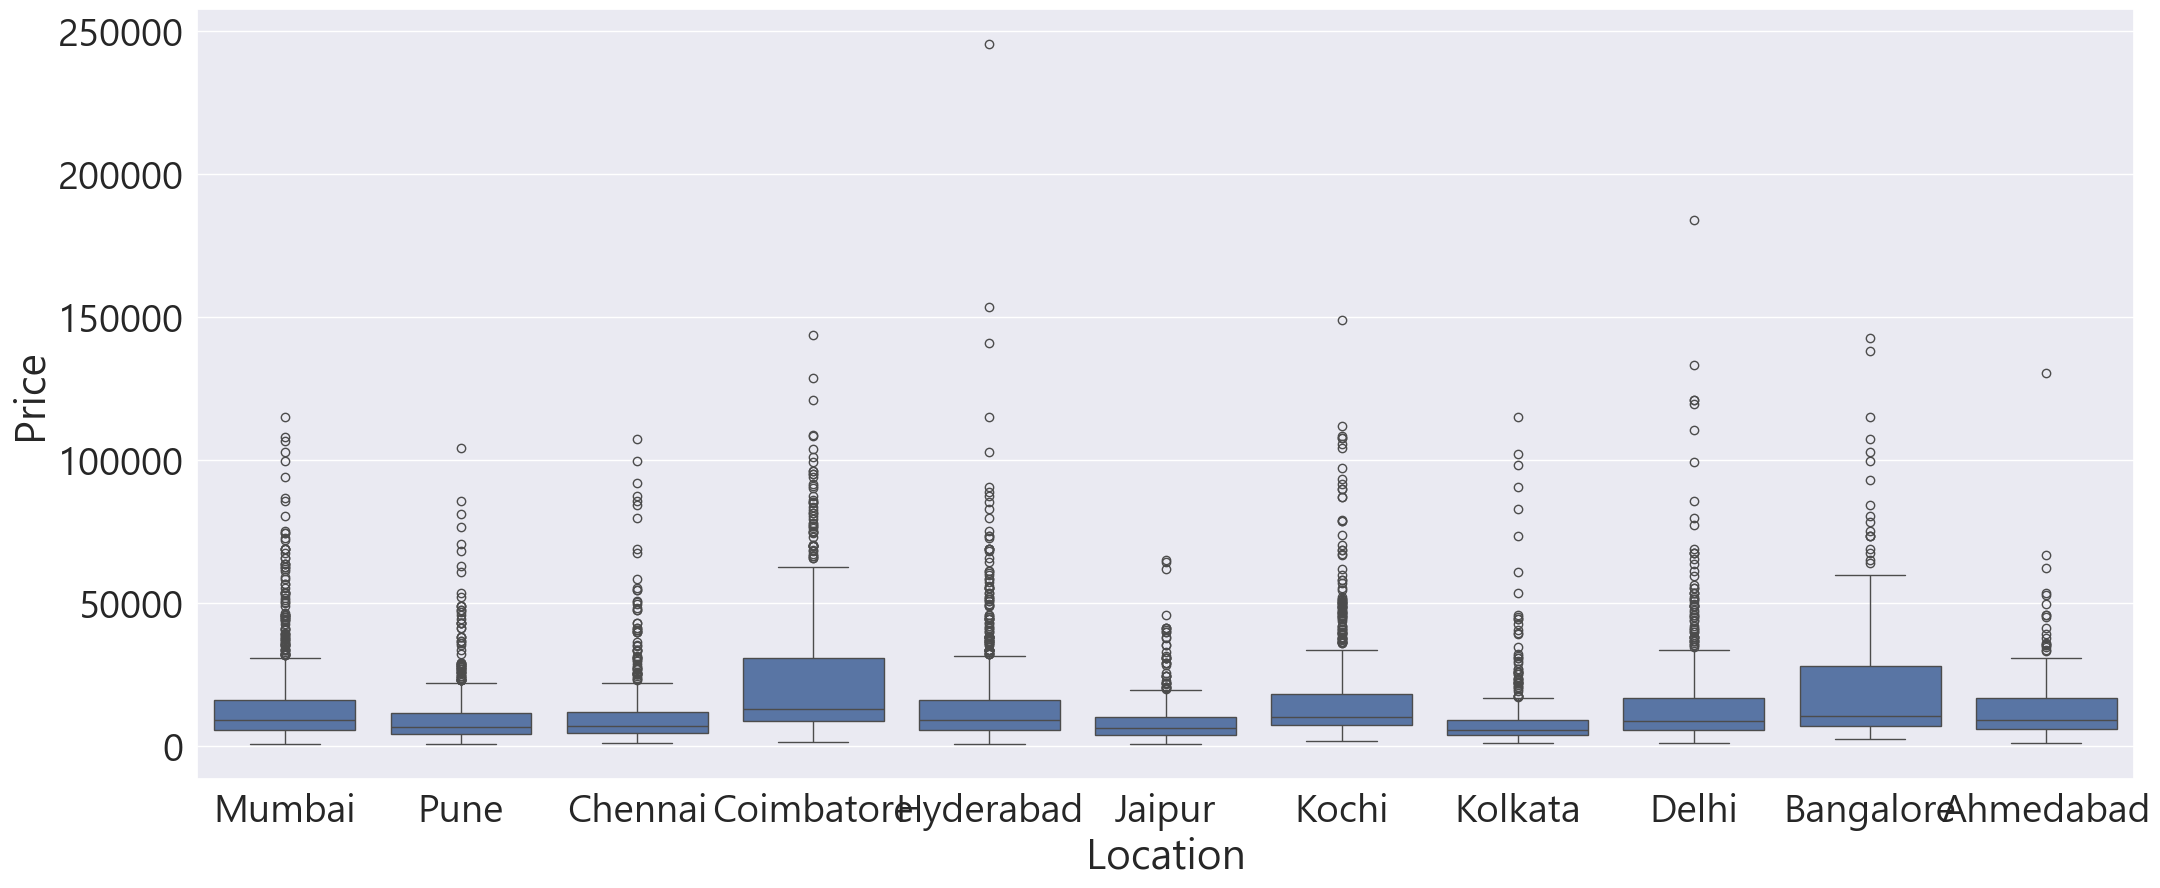

In [67]:
plt.figure(figsize=(25, 10))
sns.boxplot(x='Location', y='Price', data=df)

In [69]:
df['Brand'] = df['Name'].str.split(' ').str[0]
df['Car_Type'] = df['Name'].str.split(' ').str[1]
df['Detail'] = df['Name'].str.split(' ').str[2:]
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Engine,Power,Mileage,Brand,Car_Type,Detail
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,5,998.0,998.0,23.94,Maruti,Wagon,"[R, LXI, CNG]"
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,5,1582.0,1582.0,19.67,Hyundai,Creta,"[1.6, CRDi, SX, Option]"
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,5,1199.0,1199.0,18.20,Honda,Jazz,[V]
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,7,1248.0,1248.0,20.77,Maruti,Ertiga,[VDI]
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,5,1968.0,1968.0,15.20,Audi,A4,"[New, 2.0, TDI, Multitronic]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,Datsun GO T Petrol,Chennai,8477.27,2016,36000,Petrol,Manual,First,5,1198.0,1198.0,19.83,Datsun,GO,"[T, Petrol]"
6189,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,First,5,1047.0,1047.0,27.28,Tata,Tiago,"[1.05, Revotorq, XT, Option]"
6190,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,First,5,1497.0,1497.0,17.00,Ford,EcoSport,"[1.5, Petrol, Ambiente]"
6191,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,First,5,1368.0,1368.0,16.00,Jeep,Compass,"[1.4, Sport]"


In [71]:
df['Brand'].value_counts()

Brand
Maruti           1251
Hyundai          1095
Honda             617
Toyota            420
Volkswagen        320
Mercedes-Benz     313
Ford              303
Mahindra          279
BMW               272
Audi              240
Tata              195
Skoda             180
Renault           151
Chevrolet         121
Nissan             95
Land               52
Jaguar             43
Mitsubishi         34
Fiat               30
Mini               29
Volvo              21
Jeep               19
Porsche            18
Datsun             17
ISUZU               3
Force               3
Bentley             2
Ambassador          1
Lamborghini         1
Name: count, dtype: int64

In [73]:
table = pd.crosstab(df['Location'], df['Brand'])
chi, pval, dof, expected = stats.chi2_contingency(table)

print('chi-square test')
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.7f}'.format(pval))
print('degree of freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 719.581
p : 0.0000000
degree of freedom : 280
expected value : 
[[3.70000e-02 8.97300e+00 1.01690e+01 7.50000e-02 4.52400e+00 6.36000e-01
  1.12200e+00 1.12000e-01 1.13280e+01 2.30680e+01 4.09400e+01 1.12000e-01
  1.60800e+00 7.10000e-01 3.70000e-02 1.94400e+00 1.04310e+01 4.67720e+01
  1.17020e+01 1.08400e+00 1.27100e+00 3.55200e+00 6.73000e-01 5.64600e+00
  6.73000e+00 7.29100e+00 1.57030e+01 1.19640e+01 7.85000e-01]
 [5.80000e-02 1.39490e+01 1.58090e+01 1.16000e-01 7.03300e+00 9.88000e-01
  1.74400e+00 1.74000e-01 1.76110e+01 3.58620e+01 6.36440e+01 1.74000e-01
  2.49900e+00 1.10400e+00 5.80000e-02 3.02200e+00 1.62160e+01 7.27110e+01
  1.81920e+01 1.68600e+00 1.97600e+00 5.52200e+00 1.04600e+00 8.77600e+00
  1.04620e+01 1.13340e+01 2.44110e+01 1.85990e+01 1.22100e+00]
 [8.10000e-02 1.94350e+01 2.20260e+01 1.62000e-01 9.79900e+00 1.37700e+00
  2.42900e+00 2.43000e-01 2.45370e+01 4.99640e+01 8.86730e+01 2.43000e-01
  3.48200e+00 1.53900e+00 8.10000e-02 4.21100e

In [77]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Price ~ C(Brand) * C(Location)', data=df).fit()

# ANOVA 테이블 생성
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                            sum_sq      df           F         PR(>F)
C(Brand)              6.956234e+11    28.0  214.409507   0.000000e+00
C(Location)          -4.687810e+08    10.0   -0.404574   1.000000e+00
C(Brand):C(Location)  3.268005e+11   280.0   10.072854  3.291602e-282
Residual              6.801586e+11  5870.0         NaN            NaN


C:\Users\campus4D023\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 21
  warnings.warn('covariance of constraints does not have full '
C:\Users\campus4D023\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '
C:\Users\campus4D023\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 280, but rank is 235
  warnings.warn('covariance of constraints does not have full '


In [80]:
df['Power_Engine'] = (df['Power'] + df['Engine']) / 2

In [81]:
# Power_Engine의 평균 계산
power_engine_mean = df['Power_Engine'].mean()

# Price의 중위수 계산
price_median = df['Price'].median()

# category 파생변수 생성
def determine_category(row, power_engine_mean, price_median):
    if row['Power_Engine'] < power_engine_mean and row['Price'] < price_median:
        return '거지'
    elif row['Power_Engine'] < power_engine_mean and row['Price'] >= price_median:
        return '호구'
    elif row['Power_Engine'] >= power_engine_mean and row['Price'] < price_median:
        return '가성비'
    elif row['Power_Engine'] >= power_engine_mean and row['Price'] >= price_median:
        return '허세'

df['category'] = df.apply(determine_category, axis=1, power_engine_mean=power_engine_mean, price_median=price_median)

print(df)

                                    Name    Location     Price  Year  \
0                 Maruti Wagon R LXI CNG      Mumbai   2682.68  2010   
1       Hyundai Creta 1.6 CRDi SX Option        Pune  19162.00  2015   
2                           Honda Jazz V     Chennai   6898.32  2011   
3                      Maruti Ertiga VDI     Chennai   9197.76  2012   
4        Audi A4 New 2.0 TDI Multitronic  Coimbatore  27194.71  2013   
...                                  ...         ...       ...   ...   
6188                  Datsun GO T Petrol     Chennai   8477.27  2016   
6189  Tata Tiago 1.05 Revotorq XT Option        Pune  10822.70  2016   
6190   Ford EcoSport 1.5 Petrol Ambiente       Kochi  13474.72  2017   
6191              Jeep Compass 1.4 Sport      Mumbai  27838.55  2018   
6192            Maruti Vitara Brezza ZDi       Kochi  16203.39  2017   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats  Engine  \
0                 72000       CNG       Manual      First  

In [82]:
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Engine,Power,Mileage,Brand,Car_Type,Detail,Power_Engine,category
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,5,998.0,998.0,23.94,Maruti,Wagon,"[R, LXI, CNG]",998.0,거지
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,5,1582.0,1582.0,19.67,Hyundai,Creta,"[1.6, CRDi, SX, Option]",1582.0,호구
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,5,1199.0,1199.0,18.20,Honda,Jazz,[V],1199.0,거지
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,7,1248.0,1248.0,20.77,Maruti,Ertiga,[VDI],1248.0,호구
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,5,1968.0,1968.0,15.20,Audi,A4,"[New, 2.0, TDI, Multitronic]",1968.0,허세
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,Datsun GO T Petrol,Chennai,8477.27,2016,36000,Petrol,Manual,First,5,1198.0,1198.0,19.83,Datsun,GO,"[T, Petrol]",1198.0,거지
6189,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,First,5,1047.0,1047.0,27.28,Tata,Tiago,"[1.05, Revotorq, XT, Option]",1047.0,호구
6190,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,First,5,1497.0,1497.0,17.00,Ford,EcoSport,"[1.5, Petrol, Ambiente]",1497.0,호구
6191,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,First,5,1368.0,1368.0,16.00,Jeep,Compass,"[1.4, Sport]",1368.0,호구


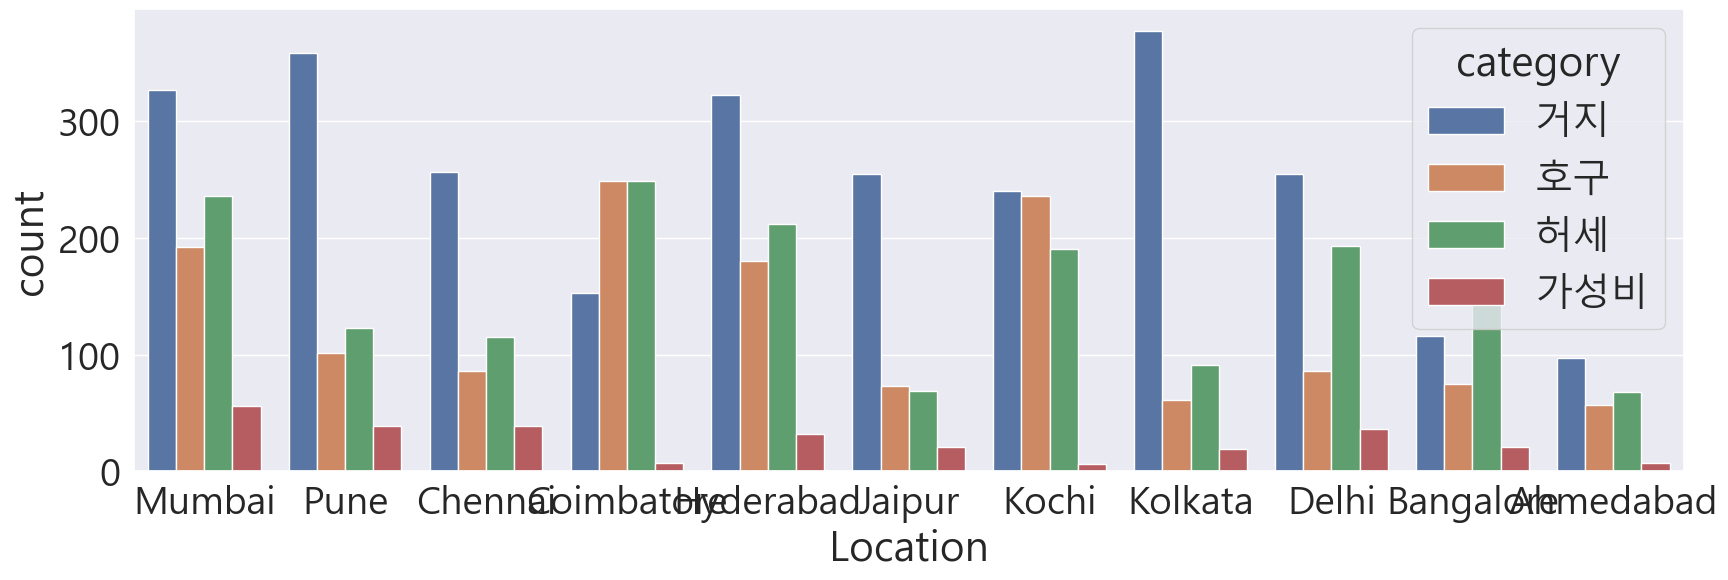

In [83]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Location', hue='category', data=df)
plt.show()

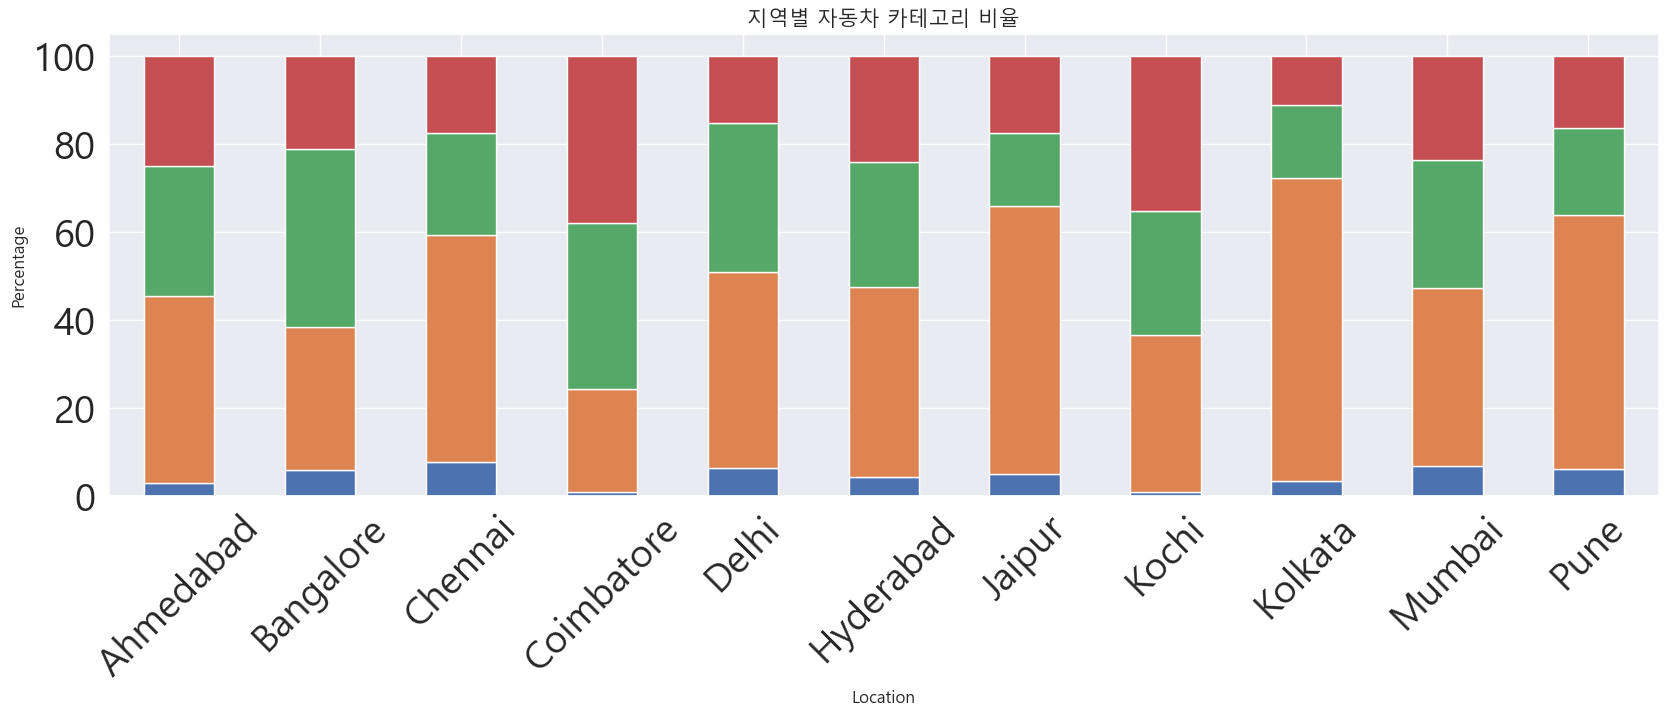

In [85]:
job_counts = df.groupby(['Location', 'category']).size().unstack(fill_value=0)
job_percentages = job_counts.div(job_counts.sum(axis=1), axis=0) * 100
plt.figure(figsize=(20, 6))
job_percentages.plot(kind='bar', stacked=True, ax=plt.gca())
# 범례 및 라벨 설정
plt.title('지역별 자동차 카테고리 비율', fontsize=15)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend().set_visible(False)
plt.xticks(rotation=45)
plt.show()

In [3]:
job_counts = df.groupby(['Brand', 'category']).size().unstack(fill_value=0)
job_percentages = job_counts.div(job_counts.sum(axis=1), axis=0) * 100
plt.figure(figsize=(50, 10))
job_percentages.plot(kind='bar', stacked=True, ax=plt.gca())
# 범례 및 라벨 설정
plt.title('브랜드별 자동차 카테고리 비율', fontsize=15)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend().set_visible(False)
plt.xticks(rotation=45)
plt.savefig('brand_category_ratio.png')
plt.show()

NameError: name 'df' is not defined

In [ ]:
job_counts = df.groupby(['Location', 'Brand']).size().unstack(fill_value=0)
job_percentages = job_counts.div(job_counts.sum(axis=1), axis=0) * 100
plt.figure(figsize=(15, 8))
job_percentages.plot(kind='bar', stacked=True, ax=plt.gca())
# 범례 및 라벨 설정
plt.title('브랜드별 자동차 카테고리 비율', fontsize=15)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend().set_visible(False)
plt.xticks(rotation=45)
plt.show()

In [6]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [7]:
job_counts = df.groupby(['Location', 'Brand']).size().unstack(fill_value=0)
job_percentages = job_counts.div(job_counts.sum(axis=1), axis=0) * 100

# plotly로 그래프 생성
fig = go.Figure()

for brand in job_percentages.columns:
    fig.add_trace(go.Bar(
        x=job_percentages.index,
        y=job_percentages[brand],
        name=brand
    ))

# 그래프 레이아웃 설정
fig.update_layout(
    barmode='stack',
    title='지역별 자동차 브랜드 비율',
    xaxis_title='Location',
    yaxis_title='Percentage',
    legend_title='Brand',
    xaxis_tickangle=-45,
    width=800,
    height=600
)

# 그래프 출력
pio.write_html(fig, file='location_brand_percentage.html', auto_open=True)

NameError: name 'df' is not defined

In [ ]:
df['Location'].value_counts().index

In [ ]:
df.to_csv('processed_data.csv')

In [ ]:
plt.figure(figsize=(30, 15))
sns.boxplot(x='Brand', y='Price', data=df)

In [ ]:
df['Brand'].value_counts()